# import

In [1]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
from os import path

In [3]:
import taproc as tp
from taproc.pre_processing import *
from taproc.dataset import *
from taproc.learner import *
from taproc.feature import *

# read file

In [4]:
file_path = Path('/media/zero/dropbox/Dropbox/Data science project/kaggle/home_credit_default_risk/data')

In [5]:
app_train = pd.read_csv(str(file_path/'application_train.csv'))

In [6]:
app_train_proc, y, na_dict = tabular_proc(app_train, y_fld = 'TARGET', max_n_cat=15)

# dataset

In [7]:
dataset = LGBDataset.sklearn_split(app_train_proc, y)

# baseline model

In [8]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':500,
    'learning_rate':0.1,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}

In [9]:
learner = LGBLearner(dataset)

In [10]:
learner.fit(params, early_stopping_rounds=50)

[1]	training's binary_logloss: 0.624724	valid_1's binary_logloss: 0.624862
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.569095	valid_1's binary_logloss: 0.569262
[3]	training's binary_logloss: 0.522684	valid_1's binary_logloss: 0.522992
[4]	training's binary_logloss: 0.484029	valid_1's binary_logloss: 0.48446
[5]	training's binary_logloss: 0.451444	valid_1's binary_logloss: 0.45193
[6]	training's binary_logloss: 0.42352	valid_1's binary_logloss: 0.424138
[7]	training's binary_logloss: 0.399703	valid_1's binary_logloss: 0.400425
[8]	training's binary_logloss: 0.379328	valid_1's binary_logloss: 0.380144
[9]	training's binary_logloss: 0.361821	valid_1's binary_logloss: 0.36273
[10]	training's binary_logloss: 0.346933	valid_1's binary_logloss: 0.347903
[11]	training's binary_logloss: 0.334016	valid_1's binary_logloss: 0.335099
[12]	training's binary_logloss: 0.32289	valid_1's binary_logloss: 0.324018
[13]	training's binary_logloss: 0.313109

[109]	training's binary_logloss: 0.236632	valid_1's binary_logloss: 0.246765
[110]	training's binary_logloss: 0.236508	valid_1's binary_logloss: 0.24675
[111]	training's binary_logloss: 0.236393	valid_1's binary_logloss: 0.246759
[112]	training's binary_logloss: 0.2363	valid_1's binary_logloss: 0.246766
[113]	training's binary_logloss: 0.236204	valid_1's binary_logloss: 0.246767
[114]	training's binary_logloss: 0.236122	valid_1's binary_logloss: 0.246767
[115]	training's binary_logloss: 0.236019	valid_1's binary_logloss: 0.246788
[116]	training's binary_logloss: 0.235933	valid_1's binary_logloss: 0.246797
[117]	training's binary_logloss: 0.235819	valid_1's binary_logloss: 0.246783
[118]	training's binary_logloss: 0.235725	valid_1's binary_logloss: 0.246788
[119]	training's binary_logloss: 0.235641	valid_1's binary_logloss: 0.246811
[120]	training's binary_logloss: 0.235539	valid_1's binary_logloss: 0.246833
[121]	training's binary_logloss: 0.23544	valid_1's binary_logloss: 0.246834
[12

[216]	training's binary_logloss: 0.226909	valid_1's binary_logloss: 0.246932
[217]	training's binary_logloss: 0.226828	valid_1's binary_logloss: 0.246919
[218]	training's binary_logloss: 0.226711	valid_1's binary_logloss: 0.246903
[219]	training's binary_logloss: 0.226616	valid_1's binary_logloss: 0.246905
Early stopping, best iteration is:
[169]	training's binary_logloss: 0.230879	valid_1's binary_logloss: 0.246643


# dendrogram

In [65]:
ddg = dendogram.from_df(x_trn)

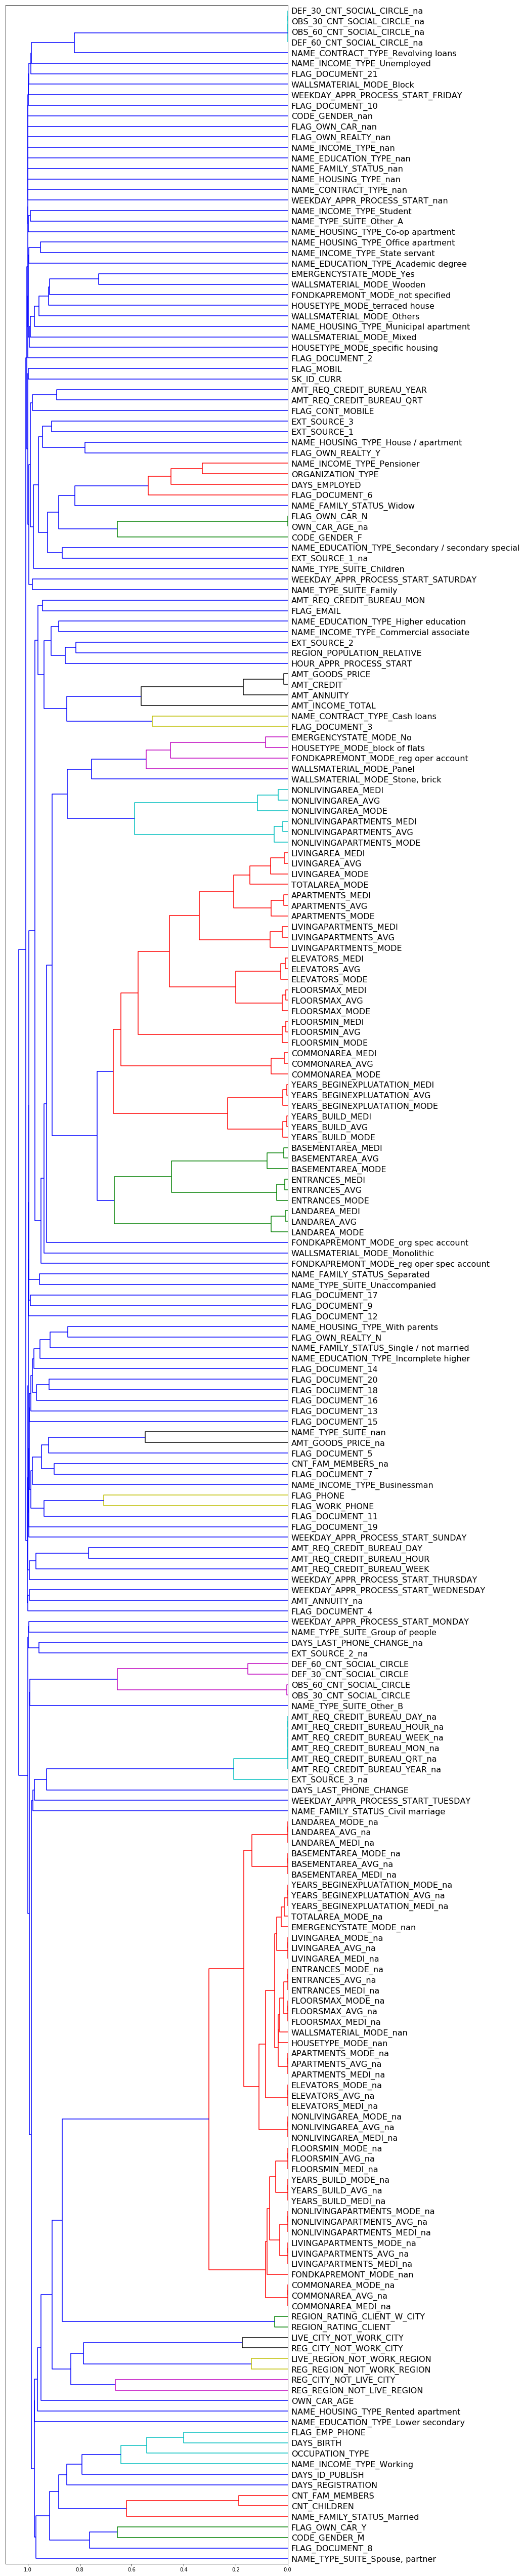

In [66]:
ddg.plot()

In [ ]:
ddg.result.head(10)

In [18]:
col_group = [['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
             ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
             ['EMERGENCYSTATE_MODE_No', 'HOUSETYPE_MODE_block of flats'],
             ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI'],
             ['NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI'],
             ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE','TOTALAREA_MODE'],
             ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
             ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
             ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
             ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
             ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE'],
             ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
             ['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE'],
             ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
             ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
             ['ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE'],
             ['LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI'],
             ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
             ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'],
             ['LANDAREA_AVG_na', 'LANDAREA_MODE_na','LANDAREA_MEDI_na'],
             ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
             ['AMT_REQ_CREDIT_BUREAU_HOUR_na', 'AMT_REQ_CREDIT_BUREAU_DAY_na', 
              'AMT_REQ_CREDIT_BUREAU_WEEK_na', 'AMT_REQ_CREDIT_BUREAU_MON_na', 
              'AMT_REQ_CREDIT_BUREAU_QRT_na', 'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
             ['LANDAREA_AVG_na', 'LANDAREA_MODE_na', 'LANDAREA_MEDI_na'],
             ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
             ['YEARS_BEGINEXPLUATATION_AVG_na', 'YEARS_BEGINEXPLUATATION_MODE_na', 
              'YEARS_BEGINEXPLUATATION_MEDI_na', 'TOTALAREA_MODE_na', 'EMERGENCYSTATE_MODE_nan'],
             ['LIVINGAREA_AVG_na', 'LIVINGAREA_MODE_na', 'LIVINGAREA_MEDI_na'],
             ['ENTRANCES_AVG_na', 'ENTRANCES_MODE_na', 'ENTRANCES_MEDI_na',
              'FLOORSMAX_AVG_na', 'FLOORSMAX_MODE_na', 'FLOORSMAX_MEDI_na', 'WALLSMATERIAL_MODE_nan'],
             ['APARTMENTS_AVG_na', 'APARTMENTS_MODE_na', 'APARTMENTS_MEDI_na', 'HOUSETYPE_MODE_nan'],
             ['ELEVATORS_AVG_na', 'ELEVATORS_MODE_na', 'ELEVATORS_MEDI_na'],
             ['NONLIVINGAREA_AVG_na', 'NONLIVINGAREA_MODE_na', 'NONLIVINGAREA_MEDI_na'],
             ['FLOORSMIN_AVG_na', 'FLOORSMIN_MODE_na', 'FLOORSMIN_MEDI_na'],
             ['YEARS_BUILD_AVG_na', 'YEARS_BUILD_MODE_na', 'YEARS_BUILD_MEDI_na'],
             ['NONLIVINGAPARTMENTS_AVG_na', 'NONLIVINGAPARTMENTS_MODE_na', 'NONLIVINGAPARTMENTS_MEDI_na'],
             ['LIVINGAPARTMENTS_AVG_na', 'LIVINGAPARTMENTS_MODE_na', 'LIVINGAPARTMENTS_MEDI_na'],
             ['COMMONAREA_AVG_na', 'COMMONAREA_MODE_na', 'COMMONAREA_MEDI_na'],
             ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']]

In [19]:
col_group = col_group + [i for i in x_trn.columns if i not in flat_list(col_group)]

In [20]:
col_group

[['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['EMERGENCYSTATE_MODE_No', 'HOUSETYPE_MODE_block of flats'],
 ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI'],
 ['NONLIVINGAPARTMENTS_MODE',
  'NONLIVINGAPARTMENTS_AVG',
  'NONLIVINGAPARTMENTS_MEDI'],
 ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'TOTALAREA_MODE'],
 ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
 ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
 ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
 ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
 ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE'],
 ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
 ['YEARS_BEGINEXPLUATATION_AVG',
  'YEARS_BEGINEXPLUATATION_MEDI',
  'YEARS_BEGINEXPLUATATION_MODE'],
 ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
 ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
 ['ENTRANCES_AVG', 'ENTR

# keep feature

In [12]:
keep_ft = flat_list([['EXT_SOURCE_3'],
 ['EXT_SOURCE_2'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['EXT_SOURCE_1'],
 ['DAYS_BIRTH'],
 ['DAYS_EMPLOYED'],
 ['CODE_GENDER_M'],
 ['NAME_EDUCATION_TYPE_Higher education'],
 ['EXT_SOURCE_1_na'],
 ['DAYS_ID_PUBLISH'],
 ['NAME_FAMILY_STATUS_Married'],
 ['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['CODE_GENDER_F'],
 ['NAME_CONTRACT_TYPE_Cash loans'],
 ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
 ['AMT_REQ_CREDIT_BUREAU_HOUR_na',
  'AMT_REQ_CREDIT_BUREAU_DAY_na',
  'AMT_REQ_CREDIT_BUREAU_WEEK_na',
  'AMT_REQ_CREDIT_BUREAU_MON_na',
  'AMT_REQ_CREDIT_BUREAU_QRT_na',
  'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
 ['AMT_REQ_CREDIT_BUREAU_QRT'],
 ['FLAG_DOCUMENT_3'],
 ['AMT_INCOME_TOTAL'],
 ['REGION_POPULATION_RELATIVE'],
 ['NAME_INCOME_TYPE_Working'],
 ['NONLIVINGAPARTMENTS_MODE',
  'NONLIVINGAPARTMENTS_AVG',
  'NONLIVINGAPARTMENTS_MEDI'],
 ['FLAG_WORK_PHONE'],
 ['AMT_REQ_CREDIT_BUREAU_YEAR'],
 ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
 ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
 ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE']])

In [13]:
x_trn = x_trn[keep_ft]
x_val = x_val[keep_ft]

NameError: name 'x_trn' is not defined